---
# 3.2 Bisection method
---

Suppose $f \in C[a,b]$ and that $f(a)$ and $f(b)$ have opposite signs; i.e.,

$$
f(a) \cdot f(b) < 0.
$$

Recall the following important theorem from calculus.

> ### Intermediate Value Theorem
>
> If $f \in C[a,b]$ and $f(a) \leq s \leq f(b)$, then there exists a real number $c \in [a,b]$ such that $f(c) = s$.

Since $f$ changes sign over $[a,b]$, the Intermediate Value Theorem implies that there is some $x^* \in [a,b]$ such that $f(x^*) = 0$.

The **bisection method** searches for a root of $f$ in $[a,b]$ as follows.

1. Let $p = (a+b)/2$ be the **midpoint** of $[a,b]$.
2. If $f(a) \cdot f(p) < 0$, then there is a root in $[a,p]$.
3. If $f(a) \cdot f(p) = 0$, then $p$ is a root.
4. If $f(a) \cdot f(p) > 0$, then there is a root in $[p,b]$.

Each time we apply the above, we get a subinterval that contains a root that is **half the size** of the interval $[a,b]$.

In [5]:
# Code the bisection method
using Printf
function bisect(f, a, b; max_iterations = 1000, tol = eps())
    fa, fb = f(a), f(b)
    
    for i in 1:max_iterations
        p = (a+b)/2
        fp= f(p)

        if abs(fp) < tol
            @printf("Found a root after %s iterations.", i)
            break
        end
        if fa*fp < 0
            b, fb = p, fp
        else
            a, fa = p, fp
        end
    end
    return (a+b)/2
end

    
f(x) = 2cosh(x/4) - x
a,b = 5.0, 10.0

p = bisect(f, a, b, tol = 1e-6)

f(p)

Found a root after 20 iterations.

-3.0233350400976633e-7

---

### Example

We will now use the above `bisect` function to find the root of

$$
f(x) = 2 \cosh(x/4) - x
$$

that lies in the interval $[5,10]$.

In [61]:
f(x) = 2cosh(x/4) - x
a,b = 5.0, 10.0

@show p = bisect(f, a, b, tol = 0.0)
p, f(p)

p = bisect(f, a, b, tol = 0.0) = 8.507199570713027


(8.507199570713027, 1.7763568394002505e-15)

---

### Example

Let's try to find the value of $y_0$ such that the solution $y(t)$ of the ordinary differential equation 

$$
\frac{dy}{dt} = t - 5 + \frac{y^2}{100}
$$

with initial value $y(0) = y_0$ satisfies $y(10) = 20$.

In [18]:
using Pkg
Pkg.add("OrdinaryDiffEq")

    Updating registry at `C:\Users\Kaelan\.julia\registries\General.toml`
   Resolving package versions...
   Installed OrdinaryDiffEq ─ v6.91.0
    Updating `C:\Users\Kaelan\OneDrive - Northern Illinois University\Documents\GitHub\20252-lecture-notes\Project.toml`
  [1dea7af3] + OrdinaryDiffEq v6.91.0
    Updating `C:\Users\Kaelan\OneDrive - Northern Illinois University\Documents\GitHub\20252-lecture-notes\Manifest.toml`
  [1dea7af3] ↑ OrdinaryDiffEq v6.90.1 ⇒ v6.91.0
  [f2b01f46] - Roots v2.2.4
 project...ecompiling
  13338.9 ms  ✓ SimpleUnPack
   9837.3 ms  ✓ FunctionWrappers
   9790.2 ms  ✓ ExprTools
   9842.3 ms  ✓ MuladdMacro
   9783.8 ms  ✓ IteratorInterfaceExtensions
   9775.7 ms  ✓ ADTypes
   9685.8 ms  ✓ UnPack
   9701.9 ms  ✓ OffsetArrays
   9842.4 ms  ✓ ConcreteStructs
    579.9 ms  ✓ DataValueInterfaces
    625.8 ms  ✓ FastPower
    645.7 ms  ✓ SIMDTypes
    700.4 ms  ✓ EnumX
    727.9 ms  ✓ ManualMemory
    796.3 ms  ✓ Inflate
    802.9 ms  ✓ EnzymeCore
    628.1 ms  ✓ If

In [28]:
using OrdinaryDiffEq  # Package for solving ordinary differential equations
using Plots, LaTeXStrings

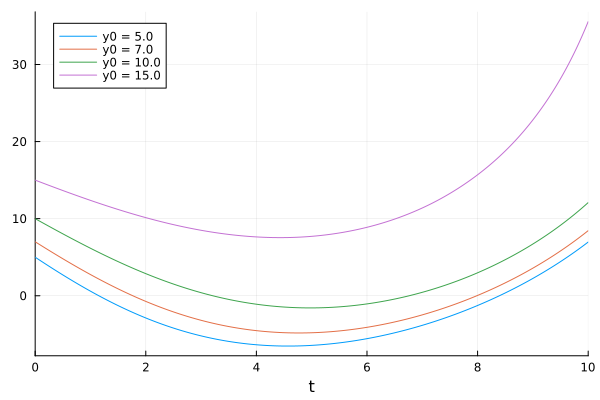

In [63]:
f(y, p, t) = t - 5 + y^2/100

function foo(y0)
    tspan = (0.0, 10.0)
    prob = ODEProblem(f, y0, tspan)
    sol = solve(prob, Tsit5())
end

initial_values = [5.0,7.0,10.0,15.0]
plot()
for y0 in initial_values
    sol = foo(y0)
    plot!(sol, label="y0 = $(y0)")
end
plot!()

In [64]:
function g(y0)
    sol = foo(y0)
    return sol(10.0) - 20.0
end

g(13.0)

p = bisect(g, 10.0, 15.0)
p,g(p)

(12.932932907322332, 1.7763568394002505e-14)

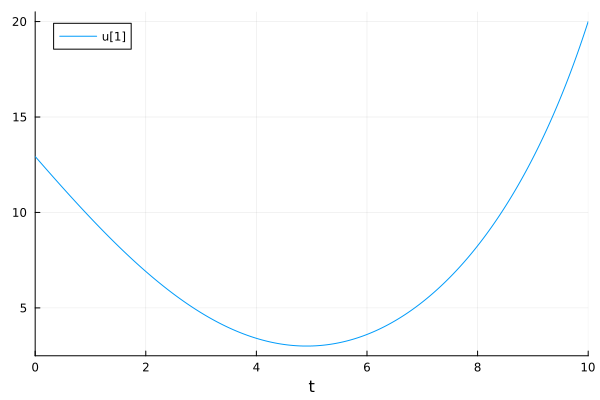

In [65]:
sol = foo(p)
plot(sol)

---

## Analyzing the bisection method

Initially, we know a root $x^*$ is somewhere in the interval $[a,b]$. If we let $x_k$ be the midpoint of the $k$th subinterval, then

$$\left|x^* - x_0\right| \leq \frac{b-a}{2}.$$

In the next iteration, 

$$\left|x^* - x_1\right| \leq \frac{b-a}{4},$$

and in the following iteration,

$$\left|x^* - x_2\right| \leq \frac{b-a}{8},$$

and so on, each time reducing our error bound by a factor of $2$.

In general,

$$\left|x^* - x_k\right| \leq \frac{b-a}{2} \cdot 2^{-k}, 
\qquad \text{for $k = 0,1,2,\ldots$}.$$

Suppose we want to compute $x_k$ such that 

$$\left|x^* - x_k\right| \leq \mathtt{atol}.$$

Then we just need to find the smallest positive integer $k$ such that

$$\frac{b-a}{2} \cdot 2^{-k} \leq \mathtt{atol}.$$

That is,

$$\frac{b-a}{2\mathtt{atol}} \leq 2^k,$$

which gives us

$$\log_2\left(\frac{b-a}{2\mathtt{atol}}\right) \leq k,$$

so we just need the first integer $k$ that is larger than $\log_2\left(\frac{b-a}{2\mathtt{atol}}\right)$. Therefore, 

$$k = \left\lceil \log_2\left(\frac{b-a}{2\mathtt{atol}}\right) \right\rceil.$$

In [34]:
atol = eps()
a, b = 8.0, 11.0
k = ceil(log2((b-a)/2atol))

53.0

---

## Pros and cons of the bisection method

Pros:

1. **Simple:** The bisection method only requires function values, is easy to understand and implement, and it is easy to analyze.

2. **Robust:** The bisection method is guaranteed to work, provided that $f$ is continuous and changes sign on the interval $[a,b]$.

Cons:

1. **Slow to converge:** The bisection method often requires many function evaluations.

2. **Does not generalize:** The bisection method only applies to solving equations involving one variable; it does not generalize to solving equations involving multiple variables.



---